# Dataset Exploration

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter

In [66]:
DATASET_PATH = "../../../dataset/"
# Load dataset
df = pd.read_csv(DATASET_PATH + "character.csv")
df

,class index,filepaths,labels,data set
0,0,train/savory/0001.jpg,savory,train
1,0,train/savory/0002.jpg,savory,train
2,0,train/savory/0003.jpg,savory,train
3,0,train/savory/0004.jpg,savory,train
4,0,train/savory/0005.jpg,savory,train
...,...,...,...,...
12415,1,valid/unsavory/296.jpg,unsavory,valid
12416,1,valid/unsavory/297.jpg,unsavory,valid
12417,1,valid/unsavory/298.jpg,unsavory,valid
12418,1,valid/unsavory/299.jpg,unsavory,valid


In [67]:
pd.options.mode.chained_assignment = None  # suppress warning

# Split dataset by train, val, test
train_df = df.groupby("data set").get_group("train")
val_df = df.groupby("data set").get_group("valid")
test_df = df.groupby("data set").get_group("test")

# Change filepaths column to full image path
train_df['filepaths'] = train_df['filepaths'].apply(lambda x: os.path.join(DATASET_PATH, x))
test_df['filepaths'] = test_df['filepaths'].apply(lambda x: os.path.join(DATASET_PATH, x))
val_df['filepaths'] = val_df['filepaths'].apply(lambda x: os.path.join(DATASET_PATH, x))
train_df

,class index,filepaths,labels,data set
0,0,../../../dataset/train/savory/0001.jpg,savory,train
1,0,../../../dataset/train/savory/0002.jpg,savory,train
2,0,../../../dataset/train/savory/0003.jpg,savory,train
3,0,../../../dataset/train/savory/0004.jpg,savory,train
4,0,../../../dataset/train/savory/0005.jpg,savory,train
...,...,...,...,...
11215,1,../../../dataset/train/unsavory/5606.jpg,unsavory,train
11216,1,../../../dataset/train/unsavory/5607.jpg,unsavory,train
11217,1,../../../dataset/train/unsavory/5608.jpg,unsavory,train
11218,1,../../../dataset/train/unsavory/5609.jpg,unsavory,train


## Data distribution

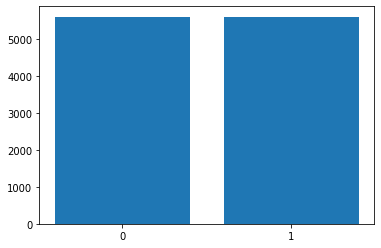

train labels distribution: [('savory', 5610), ('unsavory', 5610)]


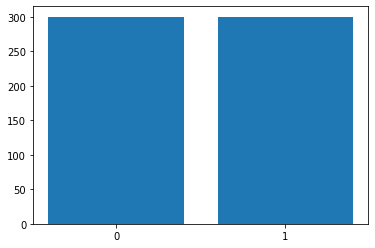

val labels distribution: [('savory', 300), ('unsavory', 300)]


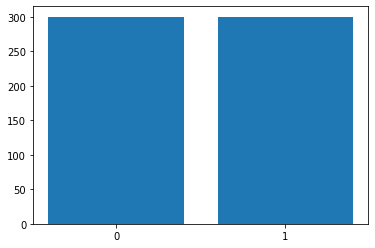

test labels distribution: [('savory', 300), ('unsavory', 300)]


In [68]:
# Plot train data distribution
train_data_distribution = sorted(Counter(train_df['labels']).items())
x = np.arange(len(train_data_distribution))
plt.bar(x, height=[val for _, val in train_data_distribution])
plt.xticks(x, range(len(train_data_distribution)))
plt.show()
print('train labels distribution:', train_data_distribution)

# Plot val data distribution
val_data_distribution = sorted(Counter(val_df['labels']).items())
x = np.arange(len(val_data_distribution))
plt.bar(x, height=[val for _, val in val_data_distribution])
plt.xticks(x, range(len(val_data_distribution)))
plt.show()
print('val labels distribution:', val_data_distribution)

# Plot test data distribution
test_data_distribution = sorted(Counter(test_df['labels']).items())
x = np.arange(len(test_data_distribution))
plt.bar(x, height=[val for _, val in test_data_distribution])
plt.xticks(x, range(len(test_data_distribution)))
plt.show()
print('test labels distribution:', test_data_distribution)

## Some examples

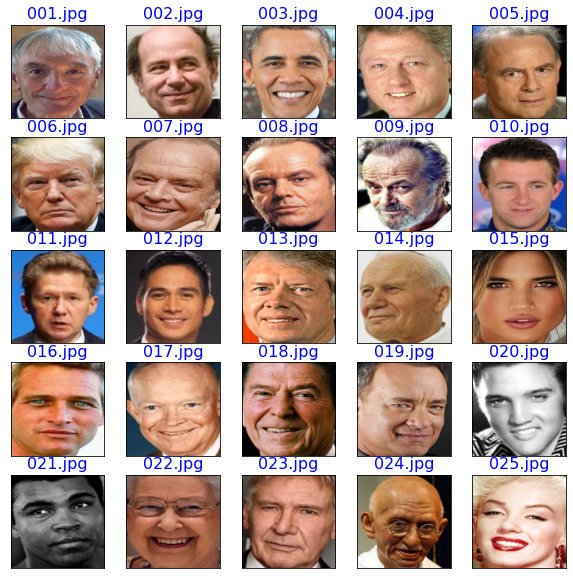

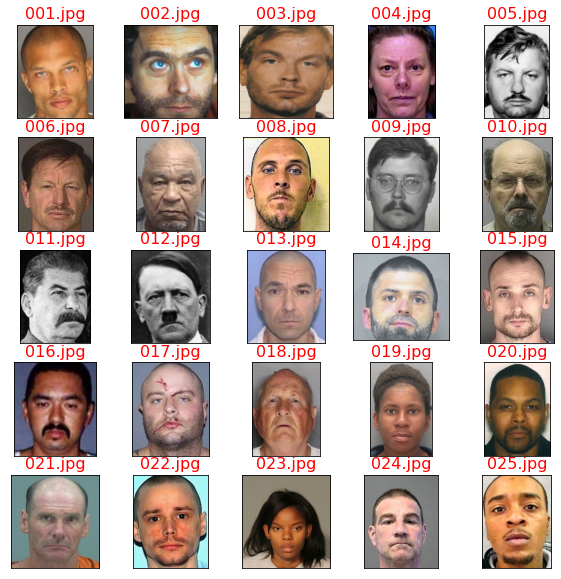

In [69]:
plt.figure(figsize=(10,10))
for i, elem in enumerate(test_df.loc[test_df['labels'] == "savory"]["filepaths"]):
    img = plt.imread(elem)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.title(elem.split('/')[-1], color='blue', fontsize=16)
    if i==24: break
plt.show()

plt.figure(figsize=(10,10))
for i, elem in enumerate(test_df.loc[test_df['labels'] == "unsavory"]["filepaths"]):
    img = plt.imread(elem)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.title(elem.split('/')[-1], color='red', fontsize=16)
    if i==24: break
plt.show()